# Heart Disease

## Creator : Mahdi Guidara

### This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('heart.csv')

#10 first lines from the data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data Preprocesing

In [4]:
data.shape

(303, 14)

In [5]:
#Obtain informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Obtain describtion about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Obtain the number of missing value 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Their is no missing value

# Data Visualisation

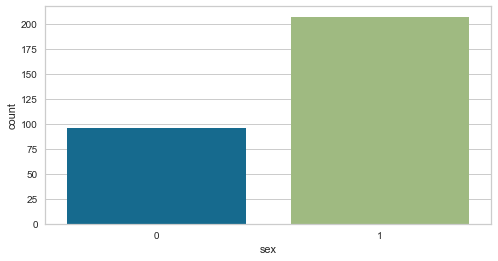

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(data.sex)
plt.show()

In [9]:
pivot = pd.crosstab(data.sex,data.target,margins=True)
pivot

target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


The majority of our dataset containe male.
The majority of women suffer from heart disease.

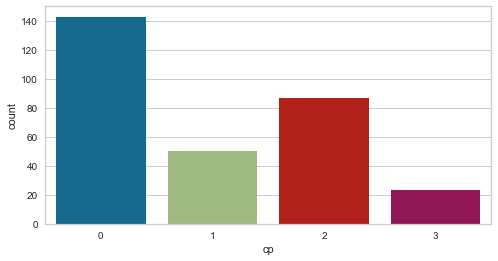

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data.cp)
plt.show()

In [11]:
pivot = pd.crosstab(data.cp,data.target,margins=True)
pivot

target,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


We have 4 value in chest pain type (1,2,3,4).
The majority of type 0 suffer from heart disease.

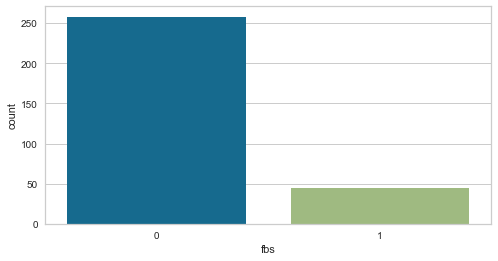

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data.fbs)
plt.show()

In [13]:
pivot = pd.crosstab(data.fbs,data.target,margins=True)
pivot

target,0,1,All
fbs,,,
0,116,142,258
1,22,23,45
All,138,165,303


fbs:fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
The majority of women suffer from heart disease.

    

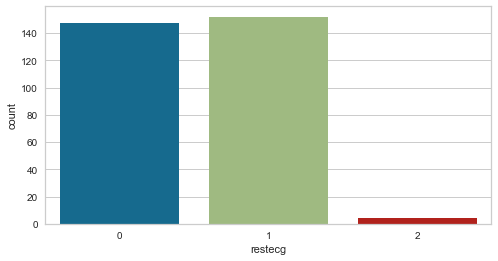

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data.restecg)
plt.show()

In [15]:
pivot = pd.crosstab(data.restecg,data.target,margins=True)
pivot

target,0,1,All
restecg,,,
0,79,68,147
1,56,96,152
2,3,1,4
All,138,165,303


restecg: resting electrocardiographic results  (values 0,1,2). The majority of class 0 have heart disease. The majority of class 1 have not a heart disease.


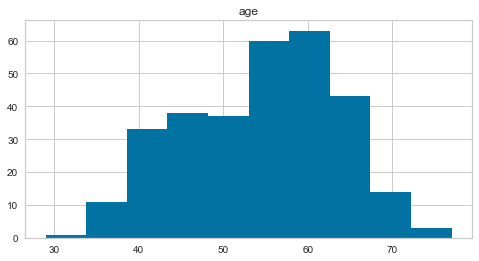

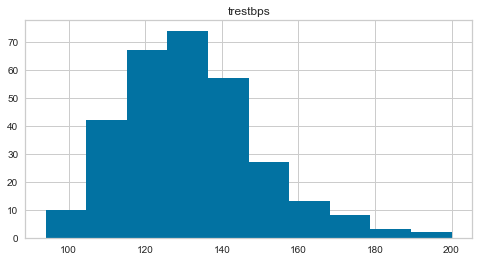

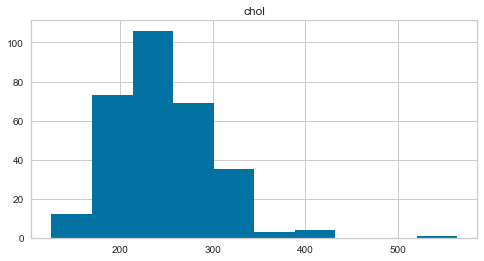

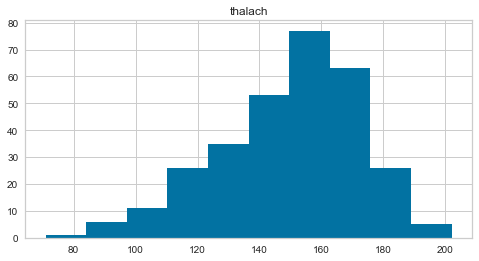

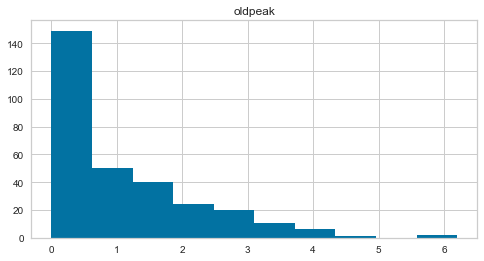

In [16]:
num=['age', 'trestbps', 'chol',
       'thalach','oldpeak']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(data[column])
    plt.title(column)
    plt.show()
    

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

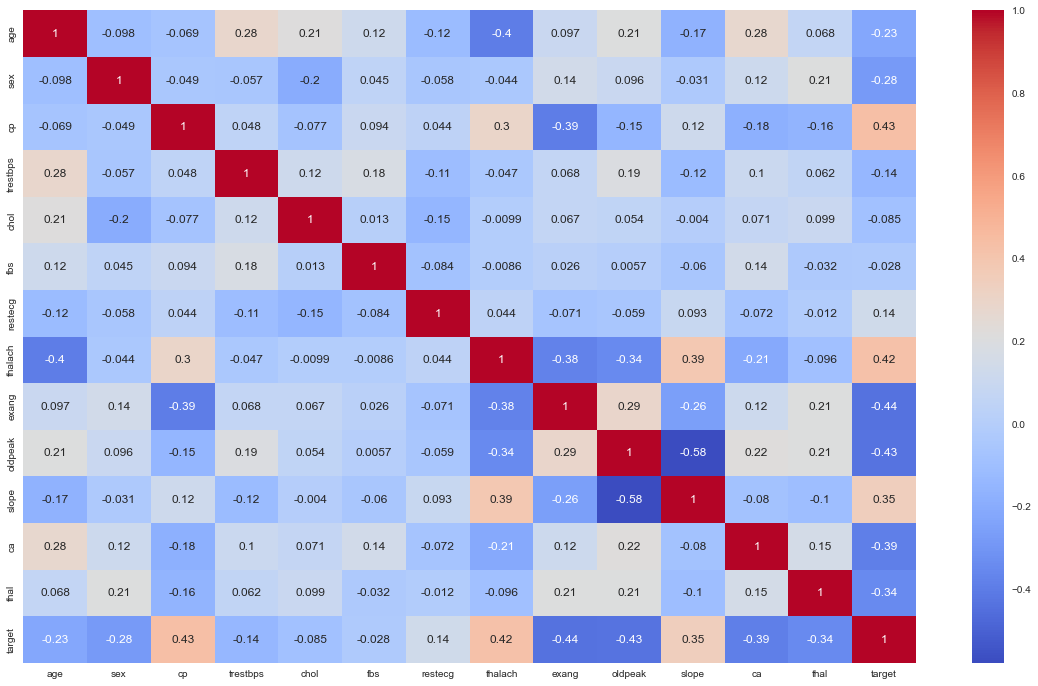

In [17]:
cor=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

From this graphe we can see that the features 'cp','thalach' and 'slope' are highly correlated.

In [18]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [19]:
data2=data
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#features extraction
x=data2[['age','sex','cp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y=data2[['target']]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=40)

# Modeling: Choosing the right algorithm

## Logistic Regression

In [50]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#build our logistic model
logreg = LogisticRegression()  

#fitting training data
logreg.fit(x_train, y_train)  

#testing model’s performance
y_pred_logistic  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.89


In [22]:
from yellowbrick.classifier import ROCAUC

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

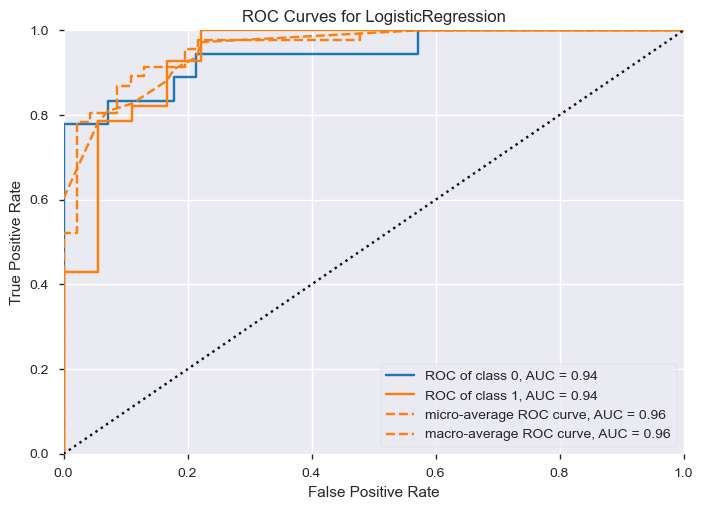

In [51]:
visualizer = ROCAUC(logreg)

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

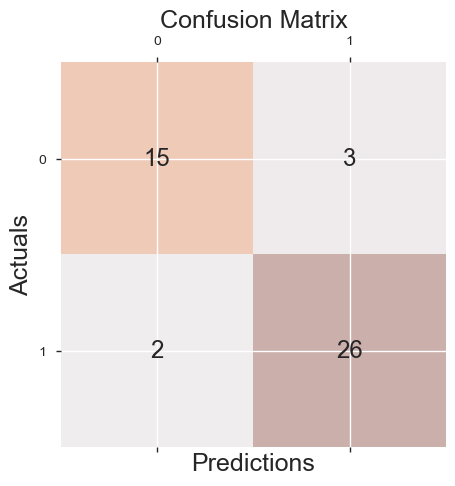

In [52]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_logistic)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [53]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [54]:
#applying tree algorithm
tree = tree.DecisionTreeClassifier()  

#fitting our model
tree.fit(x_train, y_train)   

# evaluating our model
y_pred_tree=tree.predict(x_test)  
print("accuracy:{}".format(accuracy_score(y_test, y_pred)))

accuracy:0.8913043478260869


<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

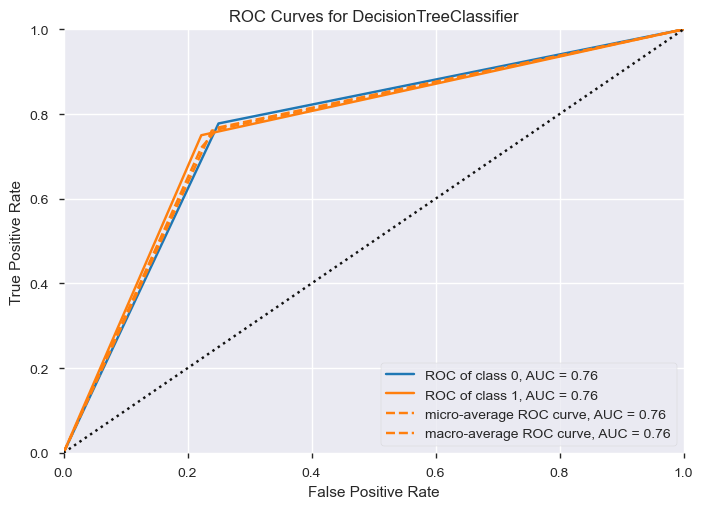

In [55]:
visualizer = ROCAUC(tree)

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

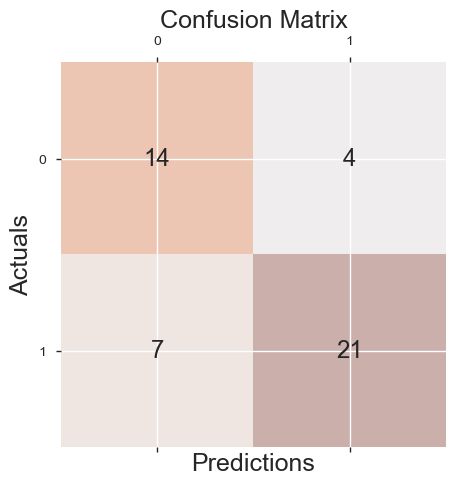

In [56]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_tree)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [59]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_forest=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8913043478260869


<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

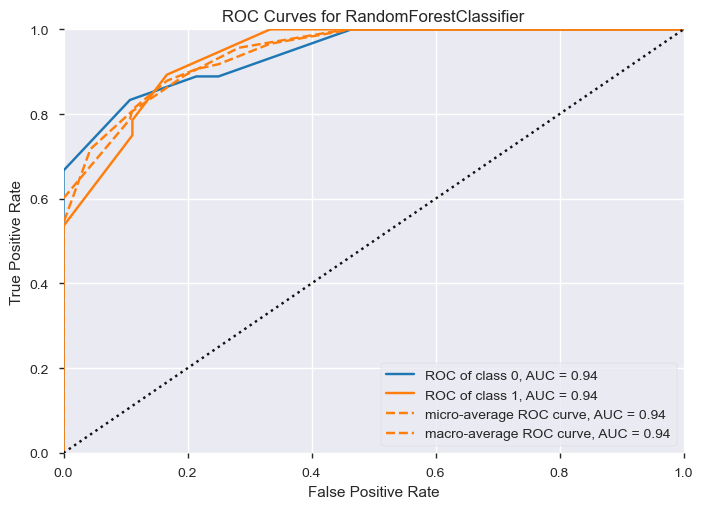

In [60]:
visualizer = ROCAUC(clf)

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

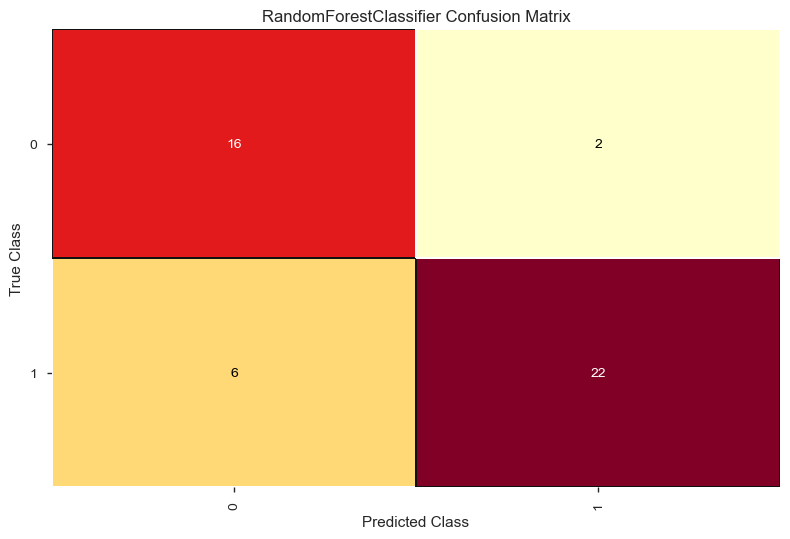

In [71]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.show()


## KNN: K-Nearest-Neighbor

In [62]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [63]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.65
Accuracy for k= 2 is: 0.65
Accuracy for k= 3 is: 0.67
Accuracy for k= 4 is: 0.67
Accuracy for k= 5 is: 0.7
Accuracy for k= 6 is: 0.67
Accuracy for k= 7 is: 0.65
Accuracy for k= 8 is: 0.67
Accuracy for k= 9 is: 0.72
Accuracy for k= 10 is: 0.65
Accuracy for k= 11 is: 0.7
Accuracy for k= 12 is: 0.63
Accuracy for k= 13 is: 0.65
Accuracy for k= 14 is: 0.67
Accuracy for k= 15 is: 0.65
Accuracy for k= 16 is: 0.61
Accuracy for k= 17 is: 0.61
Accuracy for k= 18 is: 0.57
Accuracy for k= 19 is: 0.59
Accuracy for k= 20 is: 0.54
Accuracy for k= 21 is: 0.59
Accuracy for k= 22 is: 0.57
Accuracy for k= 23 is: 0.61
Accuracy for k= 24 is: 0.54
Accuracy for k= 25 is: 0.57
Accuracy for k= 26 is: 0.54
Accuracy for k= 27 is: 0.7
Accuracy for k= 28 is: 0.61
Accuracy for k= 29 is: 0.72


Text(0, 0.5, 'Testing Accuracy')

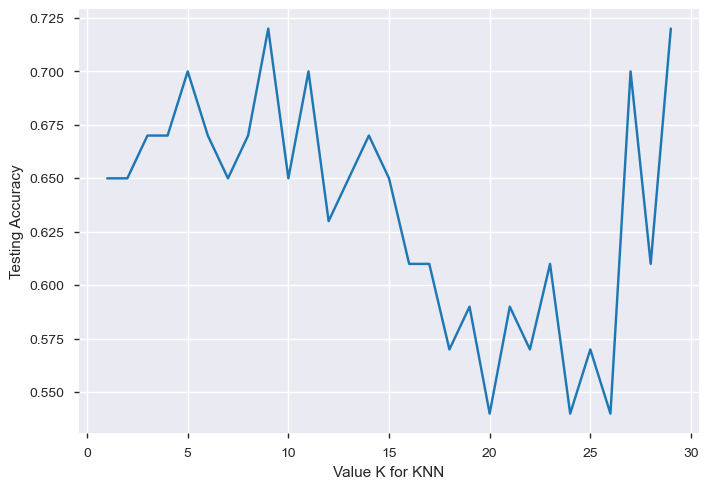

In [64]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [65]:
#build our knn classifier
knn=KNeighborsClassifier(n_neighbors=27)

#Training KNN classifier
knn.fit(x_train,y_train)

#Testing
y_pred_knn=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.717391304347826


<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

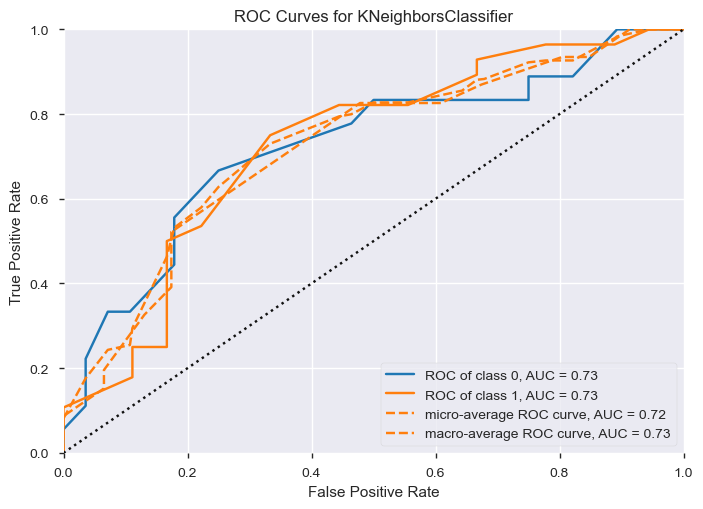

In [66]:
visualizer = ROCAUC(knn)

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

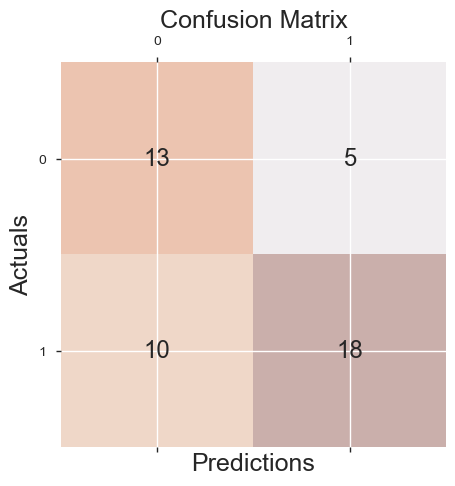

In [67]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Conclusion

After training of differnet model (Logistic Regression, Decision Tree, Random Forest, KNN: K-Nearest-Neighbor) and see their ROCAUC, we can use Logistic Regression model to predicte.